In [1]:
# -- use this line at the beginning of your notebook to turn on interactive plots
#%matplotlib inline
#%matplotlib notebook
#%matplotlib 
#%matplotlib ipympl

# Imports
import sys
import matplotlib.pyplot as plt  # plotting library
from matplotlib import colors
import numpy as np  # work with numeric arrays without labeled axes
import xarray as xr  # work with arrays with labeled axes
import xrscipy.signal as dsp  # xarray signal filtering etc.
import scipy as sps
from cdb_extras import xarray_support as cdbxr  # access to COMPASS Database (CDB)
import pickle # to save data
from pathlib import Path # to easily work with different files
from progressbar import ProgressBar
from typing import Optional, Union
from dataclasses import dataclass
from typing import Optional
plt.rcParams.update({'font.size': 14})

In [2]:
from core.pedestal_fit import PedestalParams, get_thomson_data, fit, pedestal_params_extraction
from core.sawtooth_extraction import ST_detector
from core.pedestal_ploting import load_pedestal_data, scatter_pedestal_params

In [3]:
# Only use Thomson data from this normalized psi value and up
psi_n_lim = 0.6
savesaw="/compass/home/odlozilik/repos/ELM-Sawtooth/sawtooth_data"
saveped="/compass/home/odlozilik/repos/ELM-Sawtooth/shots_pedestals"

In [5]:
#test=pedestal_params_extraction(18254, psi_n_lim,save_path=saveped)

# Create a list here of all the shots you want to extract pedestal parameters for.
shot_list = [18252,18254,18255,18257,18260,18261,18263,18266,18267,18273,18274,18275,18276,18277]
             
for shot_nr in shot_list:
    print(f"\n#### EXTRACTING PEDESTAL PARAMETERS FROM SHOT {shot_nr}\n")
    pedestal_params_extraction(shot_nr, psi_n_lim,save_path=saveped)



#### EXTRACTING PEDESTAL PARAMETERS FROM SHOT 18252



  0% (0 of 55) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Using stray corrected data
Number of H-mode intervals : 1


 23% (13 of 55) |#####                   | Elapsed Time: 0:00:01 ETA:   0:00:05

KeyboardInterrupt: 

In [8]:
# Just for testing the fitting algorithm
if True: # Set to True and run this block of code to test the fitting algorithm
    shot_nr = 18250
    time = 1200
    ne, ne_err, Te, Te_err, pe, pe_err, psi_n, psi_n_fit_coords, t_H_mode_start, t_H_mode_end = get_thomson_data(shot_nr, psi_n_lim)
    d = pe.sel(time=time, method='nearest')
    e = pe_err.sel(time=time, method='nearest')
    psi_n_one = psi_n.sel(time=time, method='nearest')

    fit(data=d, error=e, psi_n=psi_n_one,psi_n_lim=psi_n_lim, shot_nr=shot_nr, plot=True)

SawtoothCrashes(shot_number=18273, times=array([1082.579 , 1086.947 , 1091.9915, 1098.0705, 1104.6805, 1111.5455,
       1118.776 , 1125.994 , 1133.2515, 1140.547 , 1147.699 , 1154.8075,
       1162.3205, 1169.2805, 1176.298 , 1183.323 , 1188.844 , 1193.066 ,
       1196.3215, 1199.4165, 1201.856 ]), amplitudes=array([8.61247838e-08, 1.45313622e-07, 1.89463625e-07, 3.44230164e-07,
       3.87669272e-07, 3.52249515e-07, 3.44468264e-07, 3.63221216e-07,
       5.07296140e-07, 6.54221746e-07, 6.04793069e-07, 4.51928154e-07,
       4.11753864e-07, 3.58449108e-07, 3.61600043e-07, 3.45334037e-07,
       3.07741132e-07, 2.06861304e-07, 1.12708892e-07, 1.18326806e-07,
       8.95285903e-08]))

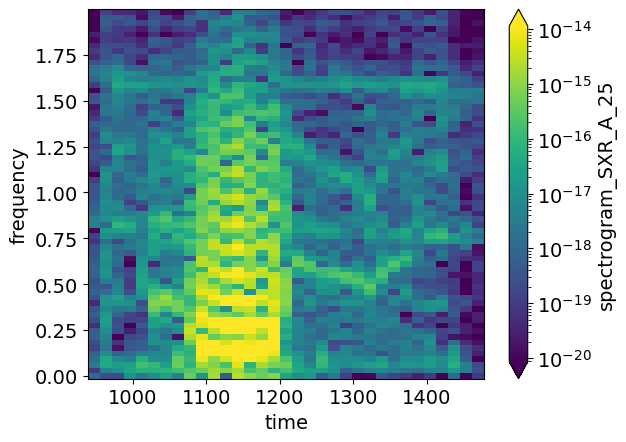

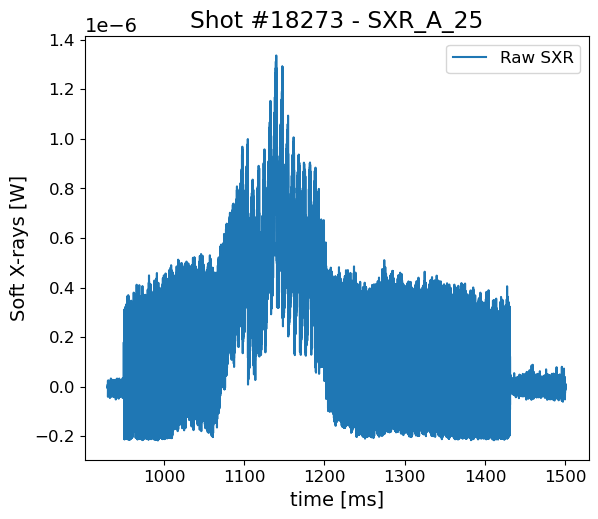

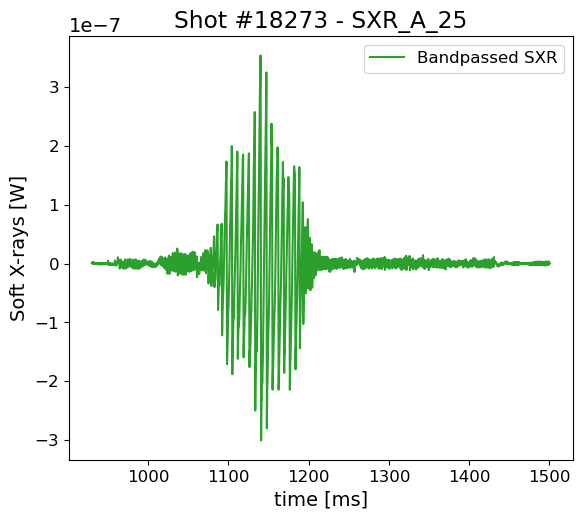

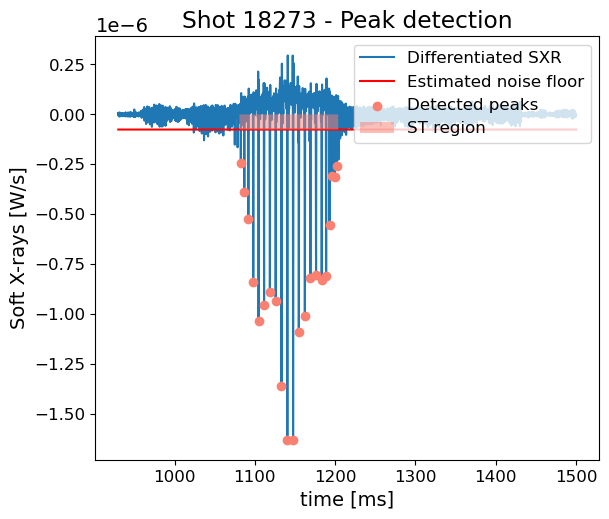

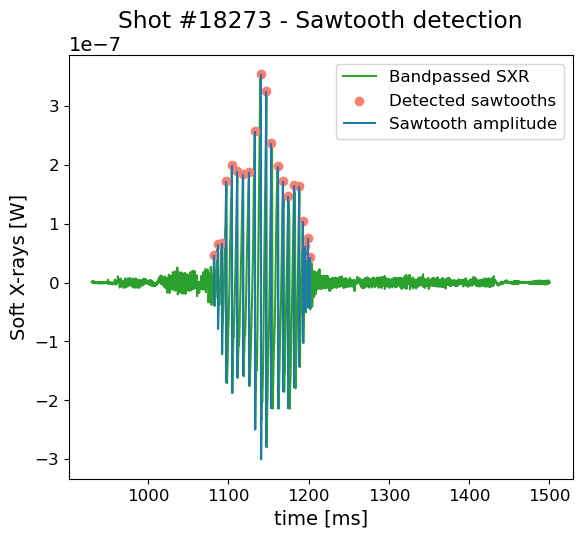

In [4]:
ST_detector(18273, with_plots=True,save_path=savesaw)

Text(0, 0.5, 'Pedestal pressure height [Pa]')

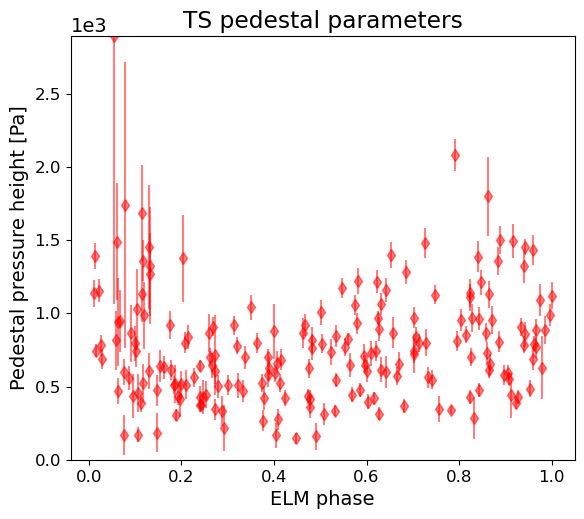

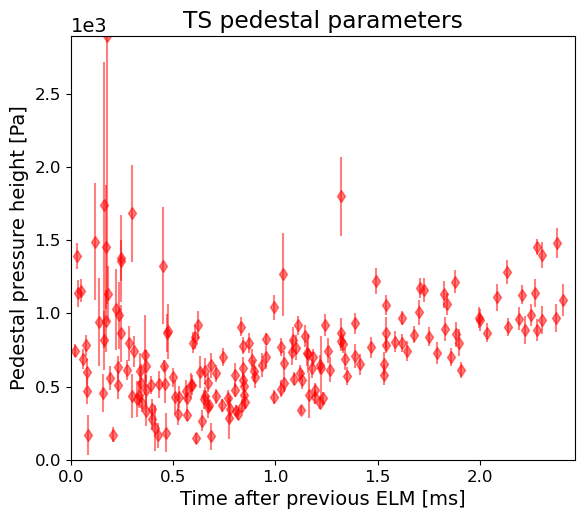

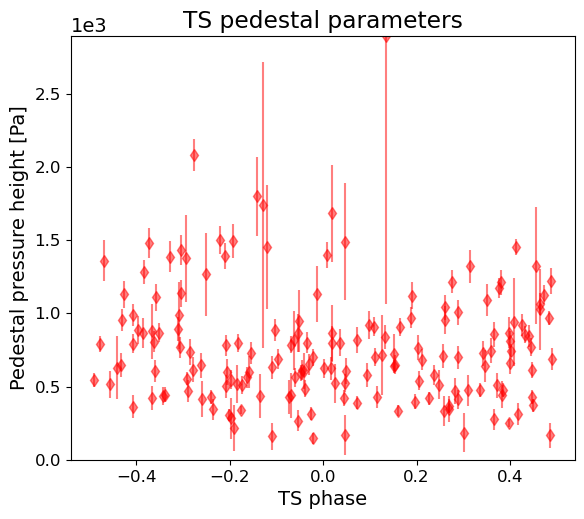

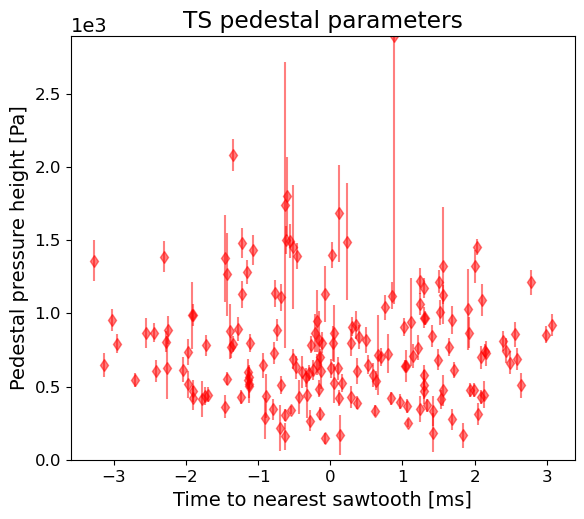

In [12]:
variable = 'pe' # One of 'pe', 'Te', 'ne'
parameter = 'height' # One of 'grad', 'height', 'width'

# Generate plots
scatter_pedestal_params(load_path='/compass/home/odlozilik/repos/ELM-Sawtooth/shots_pedestals', x='ELM_phase', s=variable, p=parameter)
plt.xlabel('ELM phase')
plt.ylabel('Pedestal pressure height [Pa]')

scatter_pedestal_params(load_path='/compass/home/odlozilik/repos/ELM-Sawtooth/shots_pedestals',x='ELM_time', s=variable, p=parameter)
plt.xlabel('Time after previous ELM [ms]')
plt.ylabel('Pedestal pressure height [Pa]')

scatter_pedestal_params(load_path='/compass/home/odlozilik/repos/ELM-Sawtooth/shots_pedestals',x='ST_phase', s=variable, p=parameter)
plt.xlabel('TS phase')
plt.ylabel('Pedestal pressure height [Pa]')

scatter_pedestal_params(load_path='/compass/home/odlozilik/repos/ELM-Sawtooth/shots_pedestals',x='ST_time', s=variable, p=parameter)
plt.xlabel('Time to nearest sawtooth [ms]')
plt.ylabel('Pedestal pressure height [Pa]')